In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# Initialize signals

## Signal + noise

In [2]:
N = 1000
x = np.zeros((N,))
x[300:700] = 1
y = x + np.random.randn(N)*1

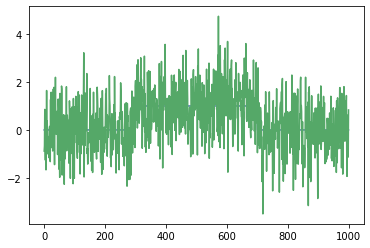

In [3]:
plt.plot(x)
plt.plot(y)
plt.show()

## Low pass filtering

In [4]:
alpha = 0.97

b_lp = np.array([1-alpha])
a_lp = np.array([1, -alpha])

In [5]:
y_lp = sig.lfilter(b_lp, a_lp, y) 

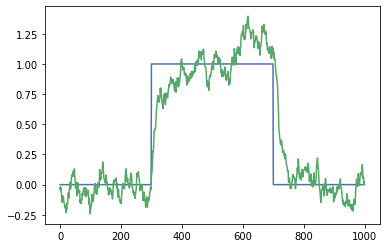

In [6]:
plt.plot(x)
plt.plot(y_lp)
plt.show()

# Filtering for uneven sampling

## Random samples


In [7]:
Ns = 100  # number of samples
si = np.sort(np.random.choice(np.arange(N), size=Ns, replace=False))
ys = y[si]

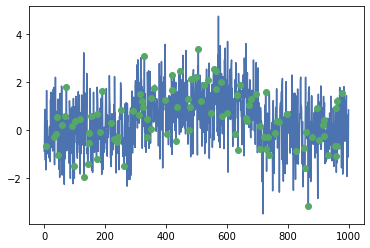

In [8]:
plt.plot(y)
plt.plot(si, ys, 'o')

## Lowpass filter with constant coefficients

In [9]:
(ys_lp, zj) = sig.lfilter(b_lp, a_lp, ys, zi=np.ones(1)*0)

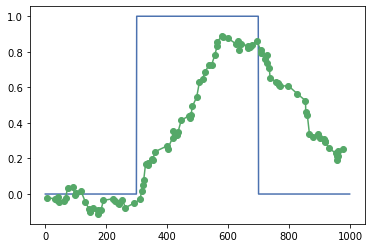

In [10]:
plt.plot(x)
plt.plot(si, ys_lp, '-o')

## Lowpass filter with adaptive coefficients

### Calculate revisit intervals

In [11]:
ri = si[1:] - si[:-1]

### Illustrate the adaptive discount factor

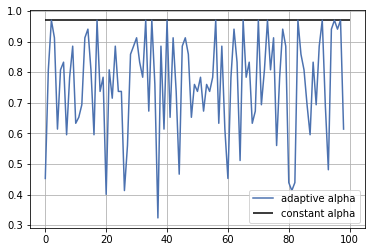

In [12]:
plt.plot(alpha**ri, label='adaptive alpha')
plt.hlines(alpha, xmin=0, xmax=Ns, label='constant alpha')
plt.grid(True)
plt.legend()

### Implement filtering

In [13]:
ys_alp = np.zeros(Ns)
y_temp = 0
ri_temp = 1
for n in range(Ns):
    y_temp = (1- alpha**ri_temp) * ys[n] + alpha**ri_temp * y_temp 
    ys_alp[n] = y_temp
    if n < Ns-1:
        ri_temp = ri[n]

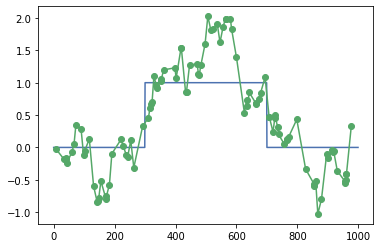

In [14]:
plt.plot(x)
plt.plot(si, ys_alp, '-o')

## Comparison

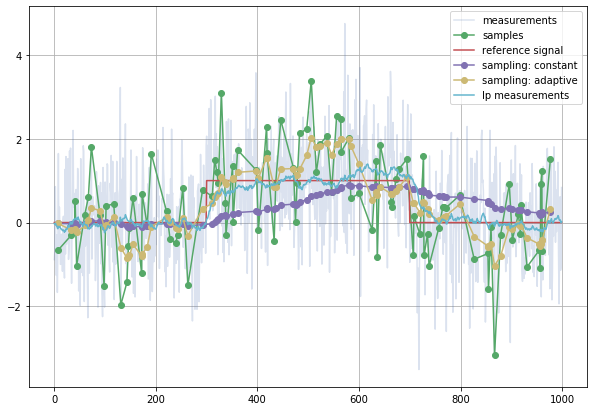

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(y, label='measurements', alpha=0.2)
plt.plot(si, ys, '-o', label='samples')
plt.plot(x, label='reference signal')
plt.plot(si, ys_lp, '-o', label='sampling: constant')
plt.plot(si, ys_alp, '-o', label='sampling: adaptive')
plt.plot(y_lp, label='lp measurements')
plt.legend()
plt.grid(True)
plt.show()

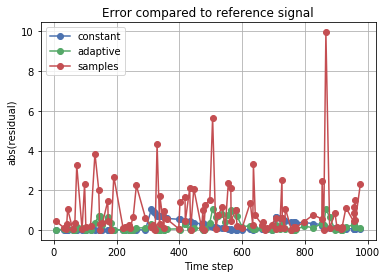

In [16]:
error_lp = np.power(ys_lp-x[si], 2)
error_adapt = np.power(ys_alp-x[si], 2)
error_samples = np.power(ys-x[si], 2)
plt.plot(si, error_lp, '-o', label='constant')
plt.plot(si, error_adapt, '-o', label='adaptive')
plt.plot(si, error_samples, '-o', label='samples')
plt.title('Error compared to reference signal')
plt.legend()
plt.grid(True)
plt.xlabel('Time step')
plt.ylabel('abs(residual)')
plt.show()

In [17]:
print(error_lp.mean())
print(error_adapt.mean())
print(error_samples.mean())

0.21219011120946296
0.2122063352314936
0.9275608396819703
